In [1]:
import sys
sys.path.append('../dgl_ptm')
import dgl_ptm
import os
os.environ["DGLBACKEND"] = "pytorch"

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/victoria/opt/anaconda3/envs/dgl_ptm/lib/python3.10/site-packages/pydantic/_internal/_fields.py:161: UserWarning: Field "model_theta" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/victoria/opt/anaconda3/envs/dgl_ptm/lib/python3.10/site-packages/pydantic/_internal/_fields.py:161: UserWarning: Field "model_theta_dist" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
model = dgl_ptm.PovertyTrapModel(model_identifier='SA_test')

In [3]:
import torch
model.set_model_parameters(**{'number_agents': 20 , 
    'seed':42,
    'sigma_dist': {'type':'uniform','parameters':[0.05,1.94],'round':True,'decimals':1},
    'a_theta_dist': {'type':'uniform','parameters':[0.1,1],'round':False,'decimals':None},
    'sensitivity_dist':{'type':'uniform','parameters':[0.0,1],'round':False,'decimals':None},
    'capital_dist': {'type':'uniform','parameters':[0.1,10.],'round':False,'decimals':None}, 
    'alpha_dist': {'type':'normal','parameters':[1.08,0.074],'round':False,'decimals':None},
    'lambda_dist': {'type':'uniform','parameters':[0.05,0.94],'round':True,'decimals':1},
    'initial_graph_type': 'barabasi-albert',
    'initial_graph_args': {'seed': 1, 'new_node_edges':1},
    'device': 'mps',
    'step_target':10,
    'steering_parameters':{'npath':'./agent_data.zarr',
                            'epath':'./edge_data', 
                            'ndata':[['degree','i_a','income','net_trade', 'tech_index','theta', 'wealth', 'wealth_consumption','weighted_degree'],['initial_only',['alpha','lambda','sigma','sensitivity']]],
                            'edata':["all"],
                            'mode':'w',
                            'capital_method':'past_shock',
                            'wealth_method':'weighted_transfer',
                            'income_method':'income_generation',
                            'tech_gamma': torch.tensor([0.3,0.35,0.45]),
                            'tech_cost': torch.tensor([0,0.15,0.65]),
                            'consume_method':'past_shock_bellman_consumption',
                            'nn_path': "/nn_data/both_PudgeSixLayer_1024/0723_110813/model_best.pth",
                            'adapt_m':torch.tensor([0,0.5,0.9]),
                            'adapt_cost':torch.tensor([0,0.25,0.45]),
                            'depreciation': 0.08,
                            'discount': 0.95,
                            'model_theta_dist': {'type':'beta','parameters':[4.13,0.07],'round':False,'decimals':None},
                            'del_method':'size',
                            'del_threshold':'balance',
                            'noise_ratio': 0.05,
                            'local_ratio': 0.25,
                            'homophily_parameter':1,
                            'characteristic_distance':3.33, 
                            'truncation_weight':1.0e-10,
                            'step_type':'ptm'}})

print(model.config.number_agents)  
print(model.config.steering_parameters)                        

{'edata': ['all'], 'epath': './edge_data', 'format': 'xarray', 'mode': 'w', 'ndata': [['degree', 'i_a', 'income', 'net_trade', 'tech_index', 'theta', 'wealth', 'wealth_consumption', 'weighted_degree'], ['initial_only', ['alpha', 'lambda', 'sigma', 'sensitivity']]], 'npath': './agent_data.zarr', 'capital_method': 'past_shock', 'wealth_method': 'weighted_transfer', 'income_method': 'income_generation', 'consume_method': 'past_shock_bellman_consumption', 'nn_path': '/nn_data/both_PudgeSixLayer_1024/0723_110813/model_best.pth', 'capital_update_method': 'default', 'characteristic_distance': 3.33, 'homophily_parameter': 1, 'adapt_m': tensor([0.0000, 0.5000, 0.9000]), 'adapt_cost': tensor([0.0000, 0.2500, 0.4500]), 'depreciation': 0.08, 'discount': 0.95, 'model_theta': None, 'model_theta_dist': MThetaDist(type='beta', parameters=tensor([4.1300, 0.0700]), round=False, decimals=None), 'tech_gamma': tensor([0.3000, 0.3500, 0.4500]), 'tech_cost': tensor([0.0000, 0.1500, 0.6500]), 'del_method': 's

In [4]:
model.initialize_model()
print (model.steering_parameters['model_theta'] )


Model torch seed set to 42
Using seed 1 for network creation with 1 edges requested.


KeyError: 'mps'

In [ ]:
model.run()

#tensor([14,  6, 35, 22,  0, 21,  9, 62, 52,  2,  7, 12, 46,  8,  7, 12, 52, 67,
#        79, 52, 67, 21, 74, 67, 64])

performing step 0 of 10
Agent graph storage type: torch.int32
performing step 1 of 10
performing step 2 of 10
performing step 3 of 10
performing step 4 of 10
performing step 5 of 10
performing step 6 of 10
performing step 7 of 10
performing step 8 of 10
performing step 9 of 10


In [ ]:
import zarr
import os
zarr_file_one = zarr.open('/Users/victoria/Documents/Scripts/Python/DGL-PTM/Sensitivity_Analysis/data_mode_A/agent_data.zarr', mode='r')
zarr_file_two = zarr.open('/Users/victoria/Documents/Scripts/Python/DGL-PTM/Sensitivity_Analysis/data_mode_B/agent_data.zarr', mode='r')
zarr_file_three = zarr.open('/Users/victoria/Documents/Scripts/Python/DGL-PTM/Sensitivity_Analysis/data_mode_B/agent_data_initial.zarr', mode='r')
zarr_file_four = zarr.open('/Users/victoria/Documents/Scripts/Python/DGL-PTM/Sensitivity_Analysis/SA_test/agent_data.zarr', mode='r')

#print(zarr_file_one.tree())
#print(zarr_file_two.tree())
#print(zarr_file_three.tree())

#attributes=os.listdir('/Users/victoria/Documents/Scripts/Python/DGL-PTM/Sensitivity_Analysis/test_SA/agent_data.zarr')
#attributes = [item for item in attributes if item not in ['.zattrs','.zmetadata','.zgroup']]
#attributes = {key: None for key in attributes}
#print(attributes)
#print(zarr_file_one['wealth'][0:2])
#print(zarr_file_two['wealth'][0:2])

#print(zarr_file_one['alpha'][0:2])
#print(zarr_file_two['alpha'][0:2])

#format: zarr_file['property'][agent(s),timestep(s)]
print(zarr_file_four['wealth'][0:20,0])

#Unnecessary:'a_table','m','tec','gamma','cost','zeros','ones', 'total_weight', "disposable_wealth"
#One-Time: 'alpha',"lambda","sigma","sensitivity"
#Every-Time: 'degree','i_a','income','net_trade', 'tech_index','theta', 'wealth', 'wealth_consumption','weighted_degree'


[8.834466  9.158539  3.890351  9.597126  3.9654372 6.0488634 2.6400673
 7.957049  9.413637  1.4185406 9.352521  5.976438  8.707104  5.7203813
 7.4368305 4.3511043 8.865885  5.781654  2.7391422 6.311746 ]


In [ ]:
ndata = ['all']
ndata = ['all_except',['a_table','m','tec','gamma','cost','zeros','ones', 'total_weight', "disposable_wealth"]]
ndata = [['all_except',['a_table','m','tec','gamma','cost','zeros','ones', 'total_weight', "disposable_wealth"]], ["initial_only",['alpha',"lambda","sigma","sensitivity"]]]
ndata = [['degree','i_a','income','net_trade', 'tech_index','theta', 'wealth', 'wealth_consumption','weighted_degree'], ["initial_only",['alpha',"lambda","sigma","sensitivity"]]]

timestep = 10

if ndata == ['all']:
    ndata = list(attributes.keys())
elif ndata[0] == 'all_except':
    ndata = list(attributes.keys() - ndata[1])
elif sum(1 for item in ndata if isinstance(item, list)) > 1:
    ndata_list = ndata
    initial_only=[]
    for specification in ndata_list:
        if specification == ['all']:
            raise ValueError('Use of "all" is not compatible with multiple data collection specification lists.')
        elif specification[0] == 'all_except':
            ndata = list(attributes.keys() - specification[1])
        elif specification[0] == 'initial_only':
            if timestep == 0:
                initial_only = specification[1]
        else:
            ndata = specification
    ndata=ndata+initial_only


print(ndata)


['degree', 'i_a', 'income', 'net_trade', 'tech_index', 'theta', 'wealth', 'wealth_consumption', 'weighted_degree']


0

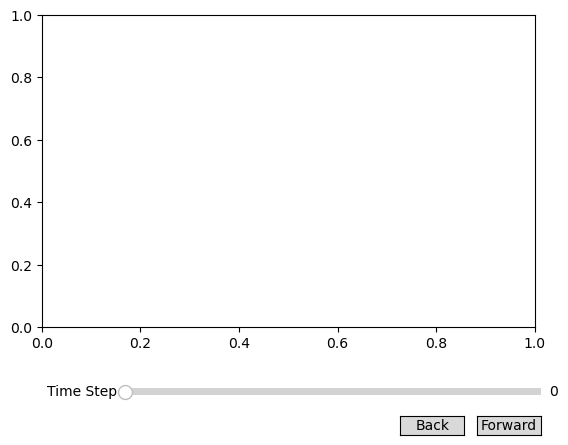

In [ ]:
import zarr
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.widgets import Slider, Button
%matplotlib widget

adapt_data = zarr.open('/Users/victoria/Documents/Scripts/Python/DGL-PTM/Sensitivity_Analysis/data_mode_B/agent_data.zarr', mode='r')

timesteps=50

figIHK=plt.figure()
ax_timestep = figIHK.add_axes([0.25, 0.1, 0.65, 0.03])
sliderIHK = Slider(ax_timestep, 'Time Step', 0, timesteps, valinit=0,valfmt='%d')


#setbins = np.linspace(0, output2.loc[TimeSample,"k_t"].max(), 200)
def incrementIHK(val):
    sliderIHK.set_val(sliderIHK.val+1)
    updateIHK(sliderIHK)

def decrementIHK(val):
    sliderIHK.set_val(sliderIHK.val-1)
    updateIHK(sliderIHK)

def updateIHK(val):

    time = int(sliderIHK.val)

    data=adapt_data['wealth'][:,f'0.{time}']
    figIHK.suptitle(f"Wealth Distribution at Time Step {time}")
    plt.cla()
    plt.xlabel("k_t")
    plt.ylabel("# of Agents/Frequency")
    _,_,a=plt.hist(data,lw=1, ec="yellow", fc="blue", alpha=0.4)
    #_,_,b=plt.hist(subset2["k_t"], setbins,lw=1, ec="black", fc="green", alpha=0.4)
    #plt.yticks([0,100,200,300,400])
    #figIHK.legend((a,b), ("No Trade", "Trading"))
    snapshot=str(f"Mean k: {data.mean()}  Max k: {data.max()}" )
    figIHK.text(0.05, 0.021, snapshot,fontsize=10, bbox=dict(fc="white", ec="white"))



fwax = figIHK.add_axes([0.8, 0.025, 0.1, 0.04])
fwbutIHK = Button(fwax, 'Forward')
bkax = figIHK.add_axes([0.68, 0.025, 0.1, 0.04])
bkbutIHK = Button(bkax, 'Back')#, color=axcolor, hovercolor='0.975')



plt.axes([0.12, 0.25, 0.77, 0.65])
sliderIHK.on_changed(updateIHK)
fwbutIHK.on_clicked(incrementIHK)
bkbutIHK.on_clicked(decrementIHK)

